## Principal Component Analysis

Perform Principal component analysis and perform clustering using first 
3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
optimum number of clusters and check whether we have obtained same number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)df

## Importing Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans

import warnings
warnings.filterwarnings('ignore')

### Loading data

In [2]:
Wine_Data=pd.read_csv("C:\\ExcelR\\Assignments\\PCA\\wine.csv")
Wine_Data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Data Understanding

In [3]:
Wine_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


#### * All datapoints are intergers or float.
#### * no null entries are found.

## Data Preprocessing

In [4]:
Input_Features=Wine_Data.drop("Type",axis=1)
Input_Features.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Scaling the Data for PCA

In [5]:
Stan_Scalar=StandardScaler()
X=pd.DataFrame(Stan_Scalar.fit_transform(Input_Features))

X.columns=Input_Features.columns
X.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


## Applying PCA

In [6]:
PCA_Variable=PCA(n_components=3)

In [7]:
PCA_Values=pd.DataFrame(PCA_Variable.fit_transform(X))
PCA_Values.columns=["PC1","PC2","PC3"]
PCA_Values.head()

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


In [8]:
pd.DataFrame(PCA_Variable.explained_variance_ratio_,index=["PC1","PC2","PC3"])

,0
PC1,0.361988
PC2,0.192075
PC3,0.111236


In [9]:
PCA_Var_Vis=PCA()
PCA_Val_Vis=PCA_Var_Vis.fit_transform(X)
Data=PCA_Var_Vis.explained_variance_ratio_
Data

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

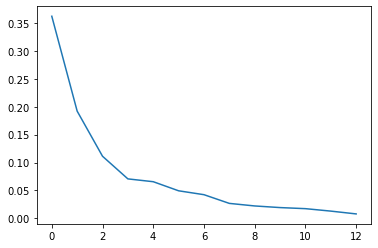

In [10]:
plt.plot(Data)

#### Since we reduced the feature Components to 3 using PCA We will be able to visualize the Features now.

<function matplotlib.pyplot.show(close=None, block=None)>

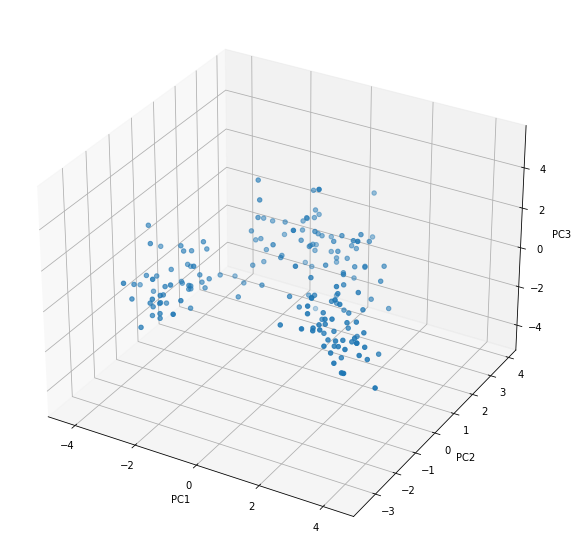

In [11]:
x=PCA_Values["PC1"]
y=PCA_Values["PC2"]
z=PCA_Values["PC3"]

plt.figure(figsize=(10,10))
axes = plt.axes(projection='3d')
axes.scatter3D(x,y,z)
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
axes.set_zlabel('PC3')
plt.show

## Using Clustering To Group the Data

In [12]:
Wine_Data["Type"].nunique()

3

#### Visualizing actual Data with PCA values

<function matplotlib.pyplot.show(close=None, block=None)>

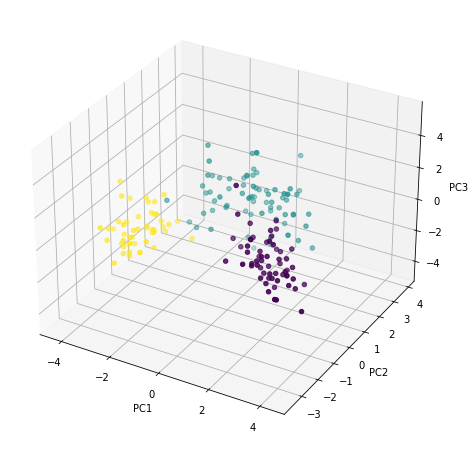

In [13]:
Wine_Data_Vis=PCA_Values
True_Values=Wine_Data["Type"]

x=PCA_Values["PC1"]
y=PCA_Values["PC2"]
z=PCA_Values["PC3"]

plt.figure(figsize=(8,8))
axes = plt.axes(projection='3d')
axes.scatter3D(x,y,z,c=True_Values)
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
axes.set_zlabel('PC3')
plt.show

## Hierarchical clustering
#### Dendogram

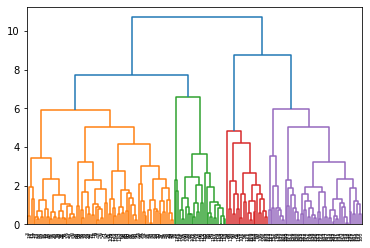

In [14]:
dendrogram = sch.dendrogram(sch.linkage(PCA_Values, method='complete'))

#### From the dendogram it can be inferred that the optimal number of clusters is 4

In [15]:
Wine=Wine_Data.copy()

Hierarchial_Clustering_4 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
HC_pred_4=Hierarchial_Clustering_4.fit_predict(PCA_Values)
Wine["HC_Pred_4"]=pd.Series(HC_pred_4)
Wine["HC_Pred_4"].value_counts()

3    78
1    50
0    28
2    22
Name: HC_Pred_4, dtype: int64

#### Visualizing predicted clusters from Hierachial clusters with PCA values

<function matplotlib.pyplot.show(close=None, block=None)>

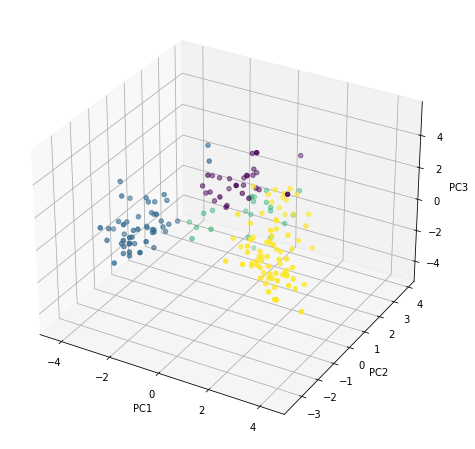

In [16]:
Wine_Data_Vis=PCA_Values
True_Values=HC_pred_4

x=PCA_Values["PC1"]
y=PCA_Values["PC2"]
z=PCA_Values["PC3"]

plt.figure(figsize=(8,8))
axes = plt.axes(projection='3d')
axes.scatter3D(x,y,z,c=True_Values)
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
axes.set_zlabel('PC3')
plt.show

## K-Means clustering

[1539.5034801883062, 886.1611364823497, 512.9995067661516, 429.803073247365, 371.02394449456716, 326.27689049596586, 291.5270134908594, 261.6843759885967, 239.04461949060334, 213.23994073321174]


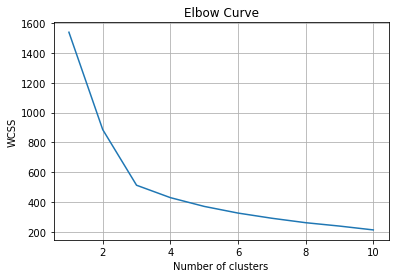

In [17]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(PCA_Values)
    wcss.append(kmeans.inertia_)

print(wcss)    
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

plt.grid()
plt.show()

#### From the elbow curve it can be inferred that the optimal value of clusters is either 3 or 4. However 3 clusters has the steep change in the curve.

In [18]:
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(PCA_Values)

KMeans(n_clusters=3, random_state=0)

In [19]:
Wine['KM_pred_3']=pd.Series(kmeans.labels_)
Wine["KM_pred_3"].value_counts()

1    64
2    63
0    51
Name: KM_pred_3, dtype: int64

#### Visualizing predicted clusters from K-means clustering with PCA values

<function matplotlib.pyplot.show(close=None, block=None)>

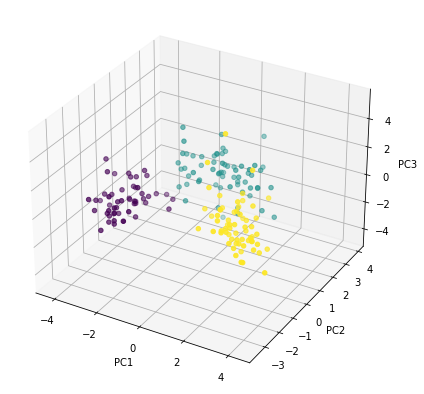

In [20]:
Wine_Data_Vis=PCA_Values
True_Values=Wine["KM_pred_3"]

x=PCA_Values["PC1"]
y=PCA_Values["PC2"]
z=PCA_Values["PC3"]

plt.figure(figsize=(8,7))
axes = plt.axes(projection='3d')
axes.scatter3D(x,y,z,c=True_Values)
axes.set_xlabel('PC1')
axes.set_ylabel('PC2')
axes.set_zlabel('PC3')
plt.show

#### * In the original data, the number of clusters was 3. With k means clustering, we got the ideal number of clusters to be 3. 
#### * In hierarchial clustering we got the ideal number of clusters to be 4